Import Package 

In [1]:
import numpy as np
import pandas as pd
import sklearn.decomposition as SKLDec
import matplotlib.pyplot as plt
import sklearn.model_selection as SKLSel
import sklearn.neural_network as SKANN
import sklearn.metrics as SKLMet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.feature_selection as fs
import sklearn.linear_model as lm
from sklearn.metrics  import  accuracy_score , confusion_matrix,f1_score,precision_score
import numpy as np
import seaborn as sns
import itertools
import sklearn.svm as SVM
import sklearn.ensemble as Ensemble
from sklearn.neighbors import KNeighborsClassifier

from sklearn.utils.multiclass import unique_labels

import io, os, sys, types
import nbimporter

from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
import Models

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Importing Jupyter notebook from Models.ipynb


In [2]:


Data=pd.read_excel('FinalDataSet.xlsx',index_col='id')


In [3]:
Data.head()

,Match_ID,DateTime,HomeScore,AwayScore,Result,HomePlayer_1_Overall,HomePlayer_2_Overall,HomePlayer_3_Overall,HomePlayer_4_Overall,HomePlayer_5_Overall,...,Last_5_match_card_home,Last_5_match_faul_home,Last_5_match_corner_home,Last_5_match_shout_total_Away,Last_5_match_shout_on_Away,Last_5_match_card_Away,Last_5_match_faul_Away,Last_5_match_corner_Away,home_team_last_result,away_team_last_result
id,,,,,,,,,,,,,,,,,,,,,
1739,1739,2008-10-29 00:00:00,2,0,1,75,64,87,86,84,...,11,56,48,54,28,7,58,20,0,-1
1740,1740,2008-10-29 00:00:00,4,4,0,79,82,84,76,83,...,14,46,55,40,25,11,50,24,1,1
1741,1741,2008-10-29 00:00:00,2,0,1,70,77,71,72,69,...,8,67,27,53,30,9,58,24,0,1
1742,1742,2008-10-29 00:00:00,0,1,-1,78,75,75,71,69,...,14,62,33,41,23,7,58,23,-1,0
1743,1743,2008-10-29 00:00:00,0,3,-1,73,70,69,69,67,...,7,57,16,60,34,6,42,24,1,-1


In [4]:
Features=Data.columns[5:]
NumberOfFeatures = len(Features)

Target=Data.columns[4]
DataSize=len(Data)
# Training Range
TrainingData=Data.iloc[0:int(DataSize*(7/10))]
# Testing Range / forecasting range
TestData = Data.iloc[ int(DataSize*(7/10)):  int(DataSize *(9/10))  ]

# BetData will be used for  test our method result  with bet ratio of famous bet companies
BetData = Data.iloc[ int(DataSize*(9/10)):]


In [5]:
print(Features)
print('Target İs : '+ str(Target))

Index(['HomePlayer_1_Overall', 'HomePlayer_2_Overall', 'HomePlayer_3_Overall',
       'HomePlayer_4_Overall', 'HomePlayer_5_Overall', 'HomePlayer_6_Overall',
       'HomePlayer_7_Overall', 'HomePlayer_8_Overall', 'HomePlayer_9_Overall',
       'HomePlayer_10_Overall', 'HomePlayer_11_Overall',
       'AwayPlayer_1_Overall', 'AwayPlayer_2_Overall', 'AwayPlayer_3_Overall',
       'AwayPlayer_4_Overall', 'AwayPlayer_5_Overall', 'AwayPlayer_6_Overall',
       'AwayPlayer_7_Overall', 'AwayPlayer_8_Overall', 'AwayPlayer_9_Overall',
       'AwayPlayer_10_Overall', 'AwayPlayer_11_Overall',
       'Last_5_match_goal_diff_home ', 'Last_5_match_win_home  ',
       'Last_5_match_goal_diff_away ', 'Last_5_match_win_away  ',
       'Last_5_match_btw', 'Team_variance_home ', 'Team_Mean_home ',
       'Team_variance_away ', 'Team_Mean_away ',
       'Last_5_match_shout_total_home ', 'Last_5_match_shout_on_home ',
       'Last_5_match_card_home ', 'Last_5_match_faul_home ',
       'Last_5_match_corner_h

# 2- Dimension Reduction and Feature Selection

## 2.1-Dimension Reduction

In [6]:
## 2.1.1 :Principal Component Analysis For Dimension Reduction
TrainingPCA = SKLDec.PCA().fit(TrainingData[Features], TrainingData[Target])



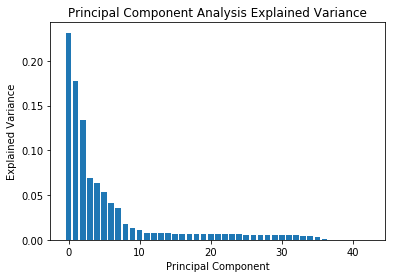

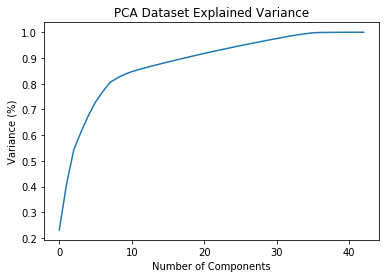

In [7]:
# Principal Component Analysis Bar Chart
fig, ax = plt.subplots()
ax.bar(x=list(range(len(Features))), height=TrainingPCA.explained_variance_ratio_)
ax.set_title('Principal Component Analysis Explained Variance')
ax.set_ylabel('Explained Variance')
ax.set_xlabel('Principal Component')
plt.show()

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(TrainingPCA.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('PCA Dataset Explained Variance')
plt.show()


In [8]:
PCADim=Models.PCADimensionFinder(TrainingPCA,NumberOfFeatures)


NewPCATraining=SKLDec.PCA(n_components=PCADim)
NewPCATesting=SKLDec.PCA(n_components=PCADim)
NewPCABetting=SKLDec.PCA(n_components=PCADim)

PCATrainingData=pd.DataFrame(NewPCATraining.fit_transform(TrainingData[Features],TrainingData[Target]))
PCATestingData= pd.DataFrame(  NewPCATesting.fit_transform(TestData[Features],TestData[Target]))
PCABettingData= pd.DataFrame( NewPCABetting.fit_transform(BetData[Features],BetData[Target]))


print(  str(TrainingData.shape[1]) + ' Dimension is reduced to ' +str(PCATrainingData.shape[1] ) + ' Dimension')



48 Dimension is reduced to 8 Dimension


In [9]:
#2.1.2   LDA Method
# Create an LDA that will reduce the data down to 2 feature

LDATrain=LinearDiscriminantAnalysis(n_components=2)
LDATest=LinearDiscriminantAnalysis(n_components=2)
LDABet=LinearDiscriminantAnalysis(n_components=2)


LDATrainingData= pd.DataFrame(LDATrain.fit(PCATrainingData, TrainingData[Target]).transform(PCATrainingData))
LDATestingData= pd.DataFrame(LDATest.fit(PCATestingData, TestData[Target]).transform(PCATestingData))
LDABettingData= pd.DataFrame(LDABet.fit(PCABettingData, BetData[Target]).transform(PCABettingData))

print(  str(PCATrainingData.shape[1]) + ' Dimension is reduced to ' +str(LDATrainingData.shape[1] ) + ' Dimension')



8 Dimension is reduced to 2 Dimension


# 2.2 Features Selectionss##


In [10]:
##################### Features Selectionss#########################

# 2.2.1. Least Absolute Shrinkage and Selection Operator

lasso = fs.SelectFromModel(estimator=lm.Lasso(alpha=0.1)).fit(TrainingData[Features], TrainingData[Target])
LassoNumber=lasso.get_support(indices=True)

LassoFeatures=Features[LassoNumber]

LassoTrainingData=TrainingData[LassoFeatures]
LassoTestingData=TestData[LassoFeatures]
LassoBetData=BetData[LassoFeatures]
print(  str(TrainingData.shape[1]) + ' Features is reduced to ' +str(LassoTrainingData.shape[1] ) + ' Fetures')

print('Slected Features : ')
print(LassoFeatures.values)


48 Features is reduced to 26 Fetures
Slected Features : 
['HomePlayer_2_Overall' 'HomePlayer_3_Overall' 'HomePlayer_4_Overall'
 'HomePlayer_5_Overall' 'HomePlayer_6_Overall' 'HomePlayer_8_Overall'
 'HomePlayer_9_Overall' 'HomePlayer_10_Overall' 'HomePlayer_11_Overall'
 'AwayPlayer_3_Overall' 'AwayPlayer_4_Overall' 'AwayPlayer_5_Overall'
 'AwayPlayer_7_Overall' 'AwayPlayer_8_Overall' 'AwayPlayer_9_Overall'
 'AwayPlayer_10_Overall' 'Last_5_match_goal_diff_home '
 'Last_5_match_goal_diff_away ' 'Last_5_match_btw' 'Team_variance_home '
 'Last_5_match_shout_total_home ' 'Last_5_match_shout_on_home '
 'Last_5_match_corner_home ' 'Last_5_match_shout_total_Away '
 'Last_5_match_faul_Away ' 'Last_5_match_corner_Away ']


In [11]:
# 2.2.2 . Recursive Feature Elimination for Features Selection
RFE = fs.RFE(estimator=lm.LinearRegression()).fit(TrainingData[Features], TrainingData[Target])

RFENumber=RFE.get_support(indices=True)
RFEFeatures  = Features[RFENumber]
RFETrainingData=TrainingData[RFEFeatures]
RFETestingData=TestData[RFEFeatures]
RRFEBetData=BetData[RFEFeatures]

print(  str(TrainingData.shape[1]) + ' Dimension is reduced to ' +str(RFETrainingData.shape[1] ) + ' Dimension')

print('Slected Features : ')
print(RFEFeatures.values)

48 Dimension is reduced to 21 Dimension
Slected Features : 
['HomePlayer_1_Overall' 'HomePlayer_2_Overall' 'HomePlayer_3_Overall'
 'HomePlayer_5_Overall' 'HomePlayer_6_Overall' 'HomePlayer_7_Overall'
 'HomePlayer_8_Overall' 'HomePlayer_9_Overall' 'AwayPlayer_1_Overall'
 'AwayPlayer_2_Overall' 'AwayPlayer_3_Overall' 'AwayPlayer_4_Overall'
 'AwayPlayer_5_Overall' 'AwayPlayer_6_Overall' 'AwayPlayer_7_Overall'
 'AwayPlayer_8_Overall' 'AwayPlayer_9_Overall' 'AwayPlayer_10_Overall'
 'AwayPlayer_11_Overall' 'Team_Mean_home ' 'Team_Mean_away ']


In [12]:
import time

ModelList=[Models.ANNResulter,Models.XGBoostesulter,Models.SVMResulter]

DataSetNames=['RawDatA','PCA','LDA','Lassot','RFE']

TrainingDataSets=[TrainingData[Features],PCATrainingData,LDATrainingData,LassoTrainingData,RFETrainingData]
TestingDataSets=[TestData[Features],PCATestingData,LDATestingData,LassoTestingData,RFETestingData]
BetDataSets=[BetData[Features],PCABettingData,LDABettingData,LassoBetData,RRFEBetData]


In [13]:
SummaryDataFrame = pd.DataFrame(columns=['F1Score', 'AccurancyRate', 'MSE', 'MAE', 'PrecisionScore'])

for Model in ModelList:
    ModelName= (str(Model.__name__)).split('Resulter')[0]
    print(ModelName+' is starting')
    start=time.time()
    for Order in range(len(DataSetNames)):
        start = time.time()

        DataSetName=DataSetNames[Order]

        ModelResult=Model( ModelName+'With'+DataSetName , TrainingDataSets[Order],TrainingData[Target],TestingDataSets[Order],TestData[Target])

        end=time.time()
        print(ModelName+'With'+DataSetName +' was finished in '+str(end-start)+' seconds' )
        SummaryDataFrame.at[ModelResult.index[0]]=ModelResult.iloc[0,:]

ANN is starting
== Multi-Layer Perceptron Method Algorithm Training Optimal Parameter Selection ==
Artificial Neural Network Regression  Optimal  Regularization:  0.1

ANNWithRawDatA was finished in 47.31944561004639 seconds
== Multi-Layer Perceptron Method Algorithm Training Optimal Parameter Selection ==
Artificial Neural Network Regression  Optimal  Regularization:  0.001

ANNWithPCA was finished in 90.98694133758545 seconds
== Multi-Layer Perceptron Method Algorithm Training Optimal Parameter Selection ==
Artificial Neural Network Regression  Optimal  Regularization:  0.1

ANNWithLDA was finished in 37.41294002532959 seconds
== Multi-Layer Perceptron Method Algorithm Training Optimal Parameter Selection ==
Artificial Neural Network Regression  Optimal  Regularization:  0.01

ANNWithLassot was finished in 47.3007230758667 seconds
== Multi-Layer Perceptron Method Algorithm Training Optimal Parameter Selection ==
Artificial Neural Network Regression  Optimal  Regularization:  0.001

A

In [14]:
SummaryDataFrame=SummaryDataFrame.sort_values(by=['AccurancyRate'],ascending=False)
SummaryDataFrame


,F1Score,AccurancyRate,MSE,MAE,PrecisionScore
XGBoostesulterWithRawDatA,0.438952,0.567979,0.985029,0.611441,0.503162
XGBoostesulterWithLassot,0.433615,0.56575,0.988417,0.615156,0.489139
ANNWithRawDatA,0.412166,0.555349,1.01913,0.642645,0.693484
XGBoostesulterWithLDA,0.387466,0.544577,1.03738,0.662333,0.36303
XGBoostesulterWithRFE,0.386066,0.541976,1.04291,0.667905,0.44317
SVMWithLDA,0.383401,0.541976,1.04398,0.668648,0.364054
ANNWithLDA,0.384809,0.541605,1.04469,0.669391,0.36033
ANNWithLassot,0.414265,0.54049,0.988793,0.632244,0.488981
ANNWithRFE,0.320436,0.514859,1.0947,0.722883,0.379093
XGBoostesulterWithPCA,0.313996,0.47214,1.16776,0.806464,0.369558


In [16]:
SummaryDataFrame.to_excel('ResultTable.xlsx')

### Model To Pickle

In [ ]:
import pickle

In [ ]:
XGBoostModelRawDataObject=Models.XGBoostModel(TrainingData[Features],TrainingData[Target])

In [ ]:
with open('TrainingObjects/XGBoostModelRawDataObject.pickle', 'wb') as handle:
    pickle.dump(XGBoostModelRawDataObject, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
XGBoostModelLassoObject=Models.XGBoostModel(LassoTrainingData,TrainingData[Target])

In [ ]:
with open('TrainingObjects/XGBoostModelLassoObject.pickle', 'wb') as handle:
    pickle.dump(XGBoostModelLassoObject, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
ANNModelRawObject=Models.ANNModel(TrainingData[Features],TrainingData[Target])

In [ ]:
with open('TrainingObjects/ANNModelRawObject.pickle', 'wb') as handle:
    pickle.dump(ANNModelRawObject, handle, protocol=pickle.HIGHEST_PROTOCOL)